In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 강서_데이터 생성 및 파생변수 생성(년, 계절별 일평균)

In [4]:
강서_데이터 = pd.read_csv('../../../../data_semi/강서_따릉이_데이터.csv', encoding='utf-8')
강서_데이터['기준_날짜'] = pd.to_datetime(강서_데이터['기준_날짜'])
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리
0,2023-04-03,25,ST-2551,ST-2551,1,1,88
1,2023-04-03,35,ST-1506,ST-1506,1,1,111
2,2023-04-03,755,ST-1351,ST-1351,1,1,88
3,2023-04-03,830,ST-525,ST-525,1,1,40
4,2023-04-03,850,ST-1506,ST-1506,1,1,111
...,...,...,...,...,...,...,...
3496962,2024-03-29,2350,ST-2888,ST-2034,1,4,520
3496963,2024-03-29,2350,ST-2965,ST-828,1,3,800
3496964,2024-03-29,2350,ST-831,ST-3129,1,3,480
3496965,2024-03-29,2355,ST-2886,ST-2789,1,4,958


In [5]:
강서_데이터.info(verbose=True, null_counts=True)

/var/folders/_j/yl1g13yd0_s25zcx_fwnjdkm0000gn/T/ipykernel_4802/772194109.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  강서_데이터.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496967 entries, 0 to 3496966
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   기준_날짜      3496967 non-null  datetime64[ns]
 1   기준_시간대     3496967 non-null  int64         
 2   시작_대여소_ID  3496967 non-null  object        
 3   종료_대여소_ID  3496967 non-null  object        
 4   전체_건수      3496967 non-null  int64         
 5   전체_이용_분    3496967 non-null  int64         
 6   전체_이용_거리   3496967 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 186.8+ MB


년, 월, 일 기준 파생변수 생성

In [6]:
강서_데이터['year'] = 강서_데이터['기준_날짜'].dt.year
강서_데이터['month'] = 강서_데이터['기준_날짜'].dt.month
강서_데이터['day'] = 강서_데이터['기준_날짜'].dt.day
강서_데이터['dayofweek'] = 강서_데이터['기준_날짜'].dt.dayofweek 
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,year,month,day,dayofweek
0,2023-04-03,25,ST-2551,ST-2551,1,1,88,2023,4,3,0
1,2023-04-03,35,ST-1506,ST-1506,1,1,111,2023,4,3,0
2,2023-04-03,755,ST-1351,ST-1351,1,1,88,2023,4,3,0
3,2023-04-03,830,ST-525,ST-525,1,1,40,2023,4,3,0
4,2023-04-03,850,ST-1506,ST-1506,1,1,111,2023,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...
3496962,2024-03-29,2350,ST-2888,ST-2034,1,4,520,2024,3,29,4
3496963,2024-03-29,2350,ST-2965,ST-828,1,3,800,2024,3,29,4
3496964,2024-03-29,2350,ST-831,ST-3129,1,3,480,2024,3,29,4
3496965,2024-03-29,2355,ST-2886,ST-2789,1,4,958,2024,3,29,4


강서구 이용량 카테고리 별 변수 저장

In [7]:
# 한시간 단위 구간 설정 후 변수 저장 

def divide_time_range1(time):
    for hour in range(24):
        if time < (hour + 1) * 100:
            return f'{hour:02d}:00~{(hour + 1):02d}:00'

강서_데이터['한시간_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range1)

# 시간대 구간별로 건수 합산
강서_시간대별_건수2 = 강서_데이터.groupby('한시간_구간')['전체_건수'].sum().reset_index()
강서_시간대별_건수2

,한시간_구간,전체_건수
0,00:00~01:00,50273
1,01:00~02:00,29765
2,02:00~03:00,18457
3,03:00~04:00,12609
4,04:00~05:00,14405
5,05:00~06:00,39365
6,06:00~07:00,115045
7,07:00~08:00,271975
8,08:00~09:00,392094
9,09:00~10:00,162121


In [8]:
# 출퇴근 시간별 컬럼 생성 후 변수에 저장 

def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00' # 출근시간
    elif time < 1600:
        return '10:00~17:00'
    elif time < 2000:
        return '17:00~21:00' # 퇴근시간
    else:
        return '20:00~24:00'
    
강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum().reset_index()
강서_시간대별_건수

,시간대_구간,전체_건수
0,00:00~06:00,164874
1,06:00~10:00,941235
2,10:00~17:00,763526
3,17:00~21:00,1212856
4,20:00~24:00,630511


In [9]:
# 숫자를 한글 요일명으로 매핑
숫자_한글_요일_매핑 = {
    0 : '월',
    1 : '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6 : '일'
}

# 요일 순서 정의
요일_순서 = ['월', '화', '수', '목', '금']

# '요일' 열의 값을 한글 요일명으로 변환
강서_데이터['dayofweek'] = 강서_데이터['dayofweek'].map(숫자_한글_요일_매핑)
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,year,month,day,dayofweek,한시간_구간,시간대_구간
0,2023-04-03,25,ST-2551,ST-2551,1,1,88,2023,4,3,월,00:00~01:00,00:00~06:00
1,2023-04-03,35,ST-1506,ST-1506,1,1,111,2023,4,3,월,00:00~01:00,00:00~06:00
2,2023-04-03,755,ST-1351,ST-1351,1,1,88,2023,4,3,월,07:00~08:00,06:00~10:00
3,2023-04-03,830,ST-525,ST-525,1,1,40,2023,4,3,월,08:00~09:00,06:00~10:00
4,2023-04-03,850,ST-1506,ST-1506,1,1,111,2023,4,3,월,08:00~09:00,06:00~10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496962,2024-03-29,2350,ST-2888,ST-2034,1,4,520,2024,3,29,금,23:00~24:00,20:00~24:00
3496963,2024-03-29,2350,ST-2965,ST-828,1,3,800,2024,3,29,금,23:00~24:00,20:00~24:00
3496964,2024-03-29,2350,ST-831,ST-3129,1,3,480,2024,3,29,금,23:00~24:00,20:00~24:00
3496965,2024-03-29,2355,ST-2886,ST-2789,1,4,958,2024,3,29,금,23:00~24:00,20:00~24:00


In [10]:
# 계절 별 컬럼 생성 후 변수에 저장 

def divide_season_range(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer' 
    elif month >= 9 and month <= 11:
        return 'fall'
    else:
        return 'winter'
    
강서_데이터['season'] = 강서_데이터['month'].apply(divide_season_range)
계절_순서 = ['spring', 'summer', 'fall', 'winter']

# 시간대 구간별로 건수 합산
강서_계절별_건수 = 강서_데이터.groupby('season')['전체_건수'].sum().reset_index()
강서_계절별_건수

,season,전체_건수
0,fall,1105416
1,spring,954867
2,summer,1102624
3,winter,550095


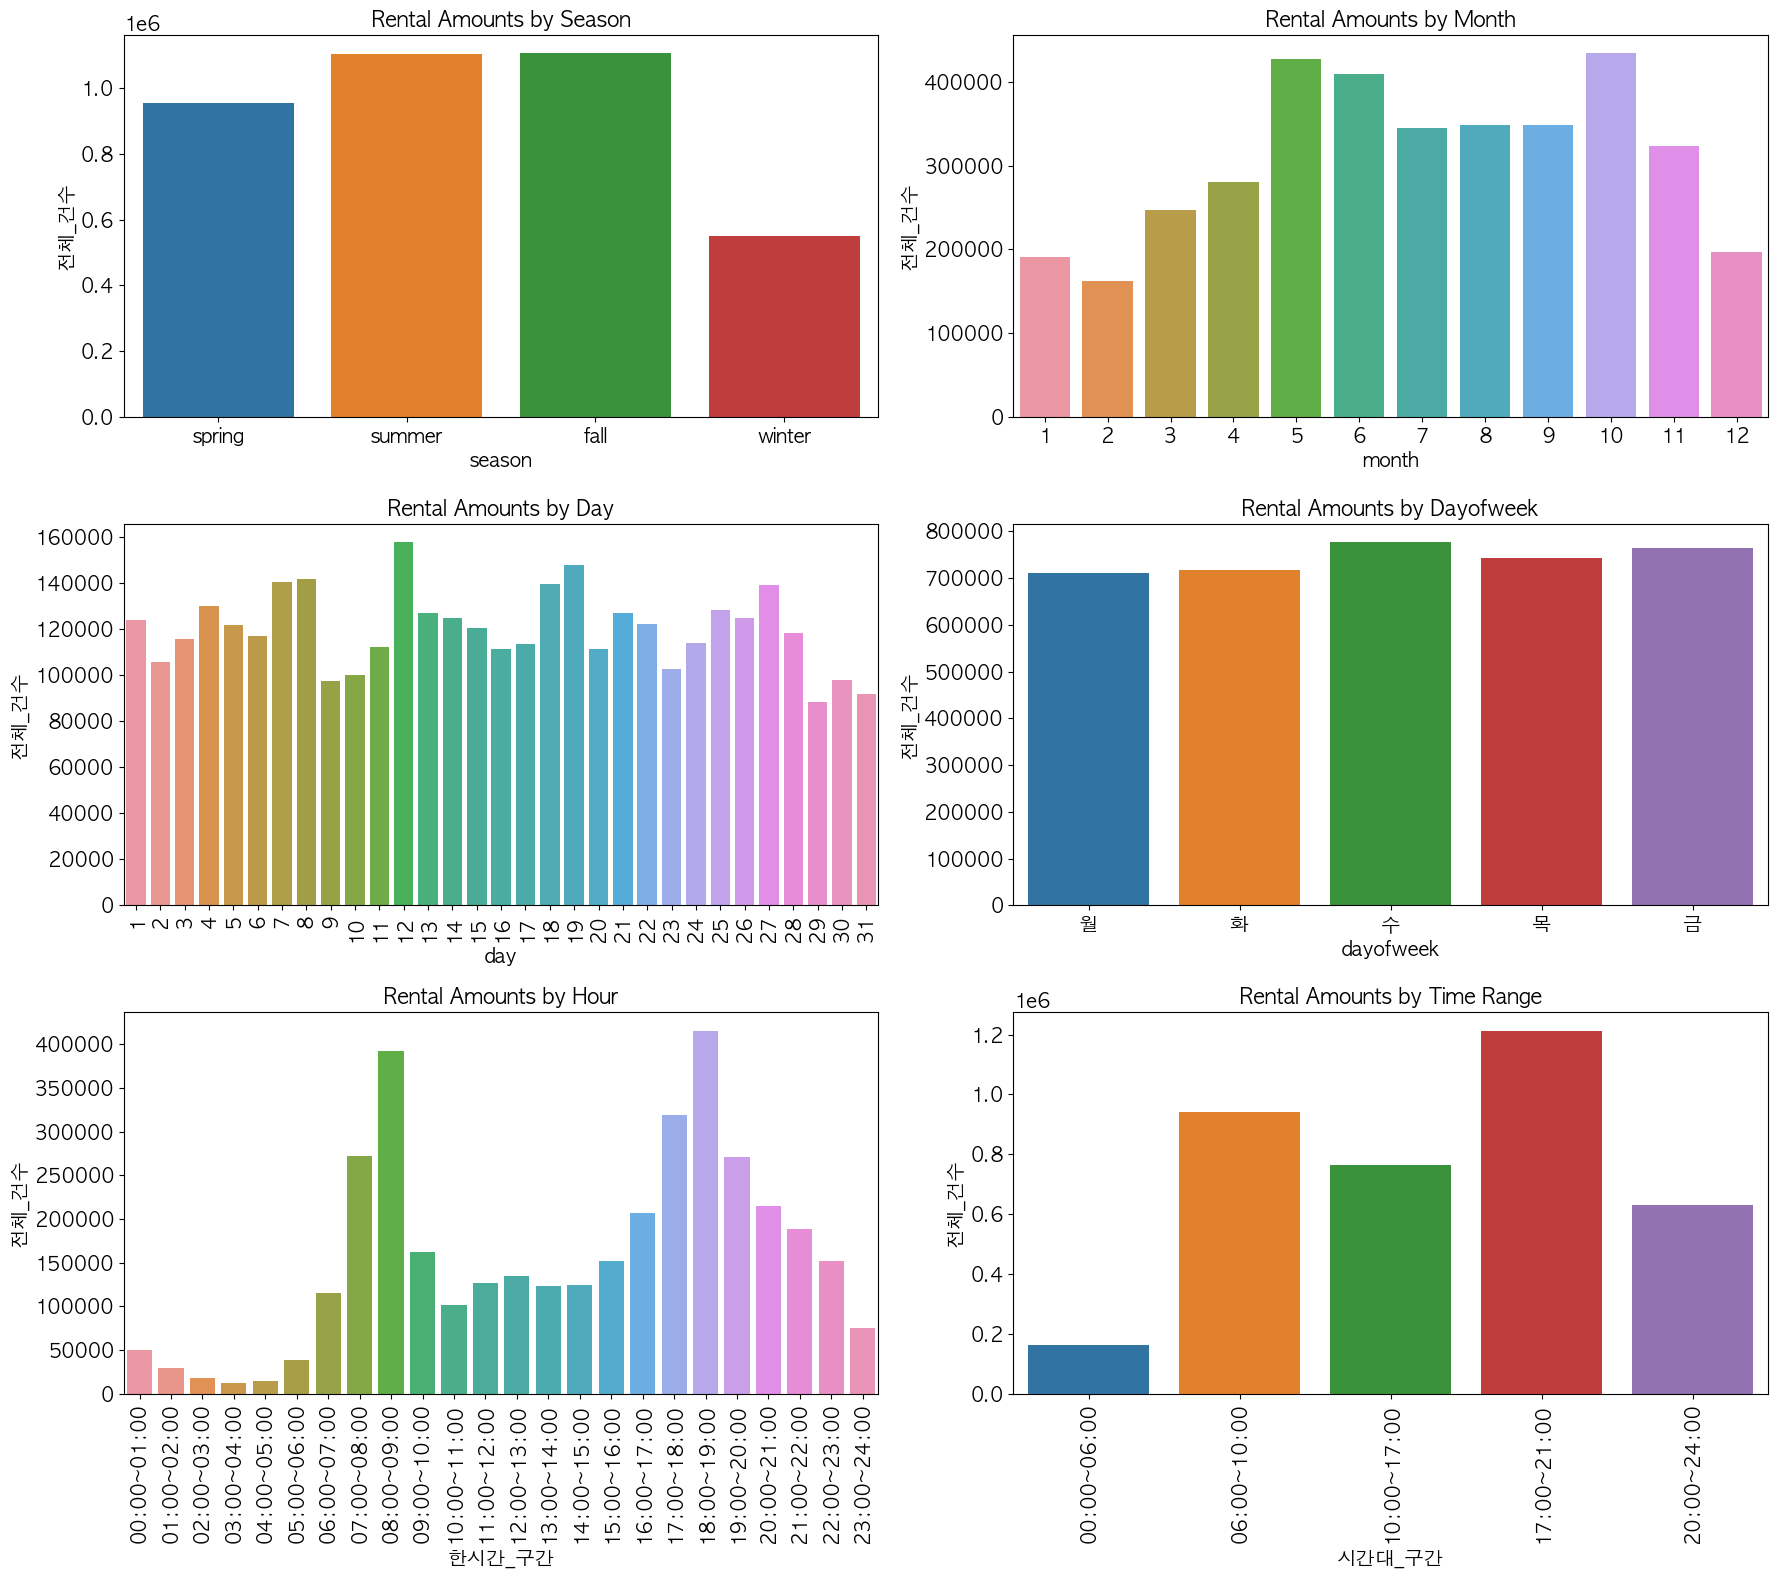

In [11]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 맥 OS 폰트 깨짐 방지 코드
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2행 2열의 subplots 준비
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15) 
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 16)) 

# subplots 할당 
sns.barplot(x='season', y='전체_건수', data=강서_계절별_건수, ax=axes[0, 0], order= 계절_순서)
sns.barplot(x='month', y='전체_건수', data=강서_데이터.groupby('month').sum().reset_index(), ax=axes[0, 1])
sns.barplot(x='day', y='전체_건수', data=강서_데이터.groupby('day').sum().reset_index(), ax=axes[1, 0])
sns.barplot(x='dayofweek', y='전체_건수', data=강서_데이터.groupby('dayofweek').sum().reset_index(), ax=axes[1, 1], order= 요일_순서)
sns.barplot(x='한시간_구간', y='전체_건수', data=강서_시간대별_건수2, ax=axes[2, 0])
sns.barplot(x='시간대_구간', y='전체_건수', data=강서_시간대별_건수, ax=axes[2, 1])

# subplots 이름 정해주기
axes[0, 0].set(title='Rental Amounts by Season')
axes[0, 1].set(title='Rental Amounts by Month')
axes[1, 0].set(title='Rental Amounts by Day')
axes[1, 1].set(title='Rental Amounts by Dayofweek')
axes[2, 0].set(title='Rental Amounts by Hour')
axes[2, 1].set(title='Rental Amounts by Time Range')

# x축 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[2, 0].tick_params(axis='x', labelrotation=90)
axes[2, 1].tick_params(axis='x', labelrotation=90)

# 출력
plt.tight_layout() 
plt.show()


In [12]:
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,year,month,day,dayofweek,한시간_구간,시간대_구간,season
0,2023-04-03,25,ST-2551,ST-2551,1,1,88,2023,4,3,월,00:00~01:00,00:00~06:00,spring
1,2023-04-03,35,ST-1506,ST-1506,1,1,111,2023,4,3,월,00:00~01:00,00:00~06:00,spring
2,2023-04-03,755,ST-1351,ST-1351,1,1,88,2023,4,3,월,07:00~08:00,06:00~10:00,spring
3,2023-04-03,830,ST-525,ST-525,1,1,40,2023,4,3,월,08:00~09:00,06:00~10:00,spring
4,2023-04-03,850,ST-1506,ST-1506,1,1,111,2023,4,3,월,08:00~09:00,06:00~10:00,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496962,2024-03-29,2350,ST-2888,ST-2034,1,4,520,2024,3,29,금,23:00~24:00,20:00~24:00,spring
3496963,2024-03-29,2350,ST-2965,ST-828,1,3,800,2024,3,29,금,23:00~24:00,20:00~24:00,spring
3496964,2024-03-29,2350,ST-831,ST-3129,1,3,480,2024,3,29,금,23:00~24:00,20:00~24:00,spring
3496965,2024-03-29,2355,ST-2886,ST-2789,1,4,958,2024,3,29,금,23:00~24:00,20:00~24:00,spring


### 계절 별로 그룹화하여 데이터프레임 나누기

In [13]:
# season을 기준으로 그룹 별로 데이터프레임 나누기
grouped_dataframes = {}
for name, group in 강서_데이터.groupby('season'):
    grouped_dataframes[name] = group

# 그룹 별로 나눠진 데이터프레임을 각각 다른 변수로 저장
spring_data = grouped_dataframes['spring']
summer_data = grouped_dataframes['summer']
fall_data = grouped_dataframes['fall']
winter_data = grouped_dataframes['winter']

계절 별 'Rental Amounts by Time Range' 
* 계절 전체 데이터

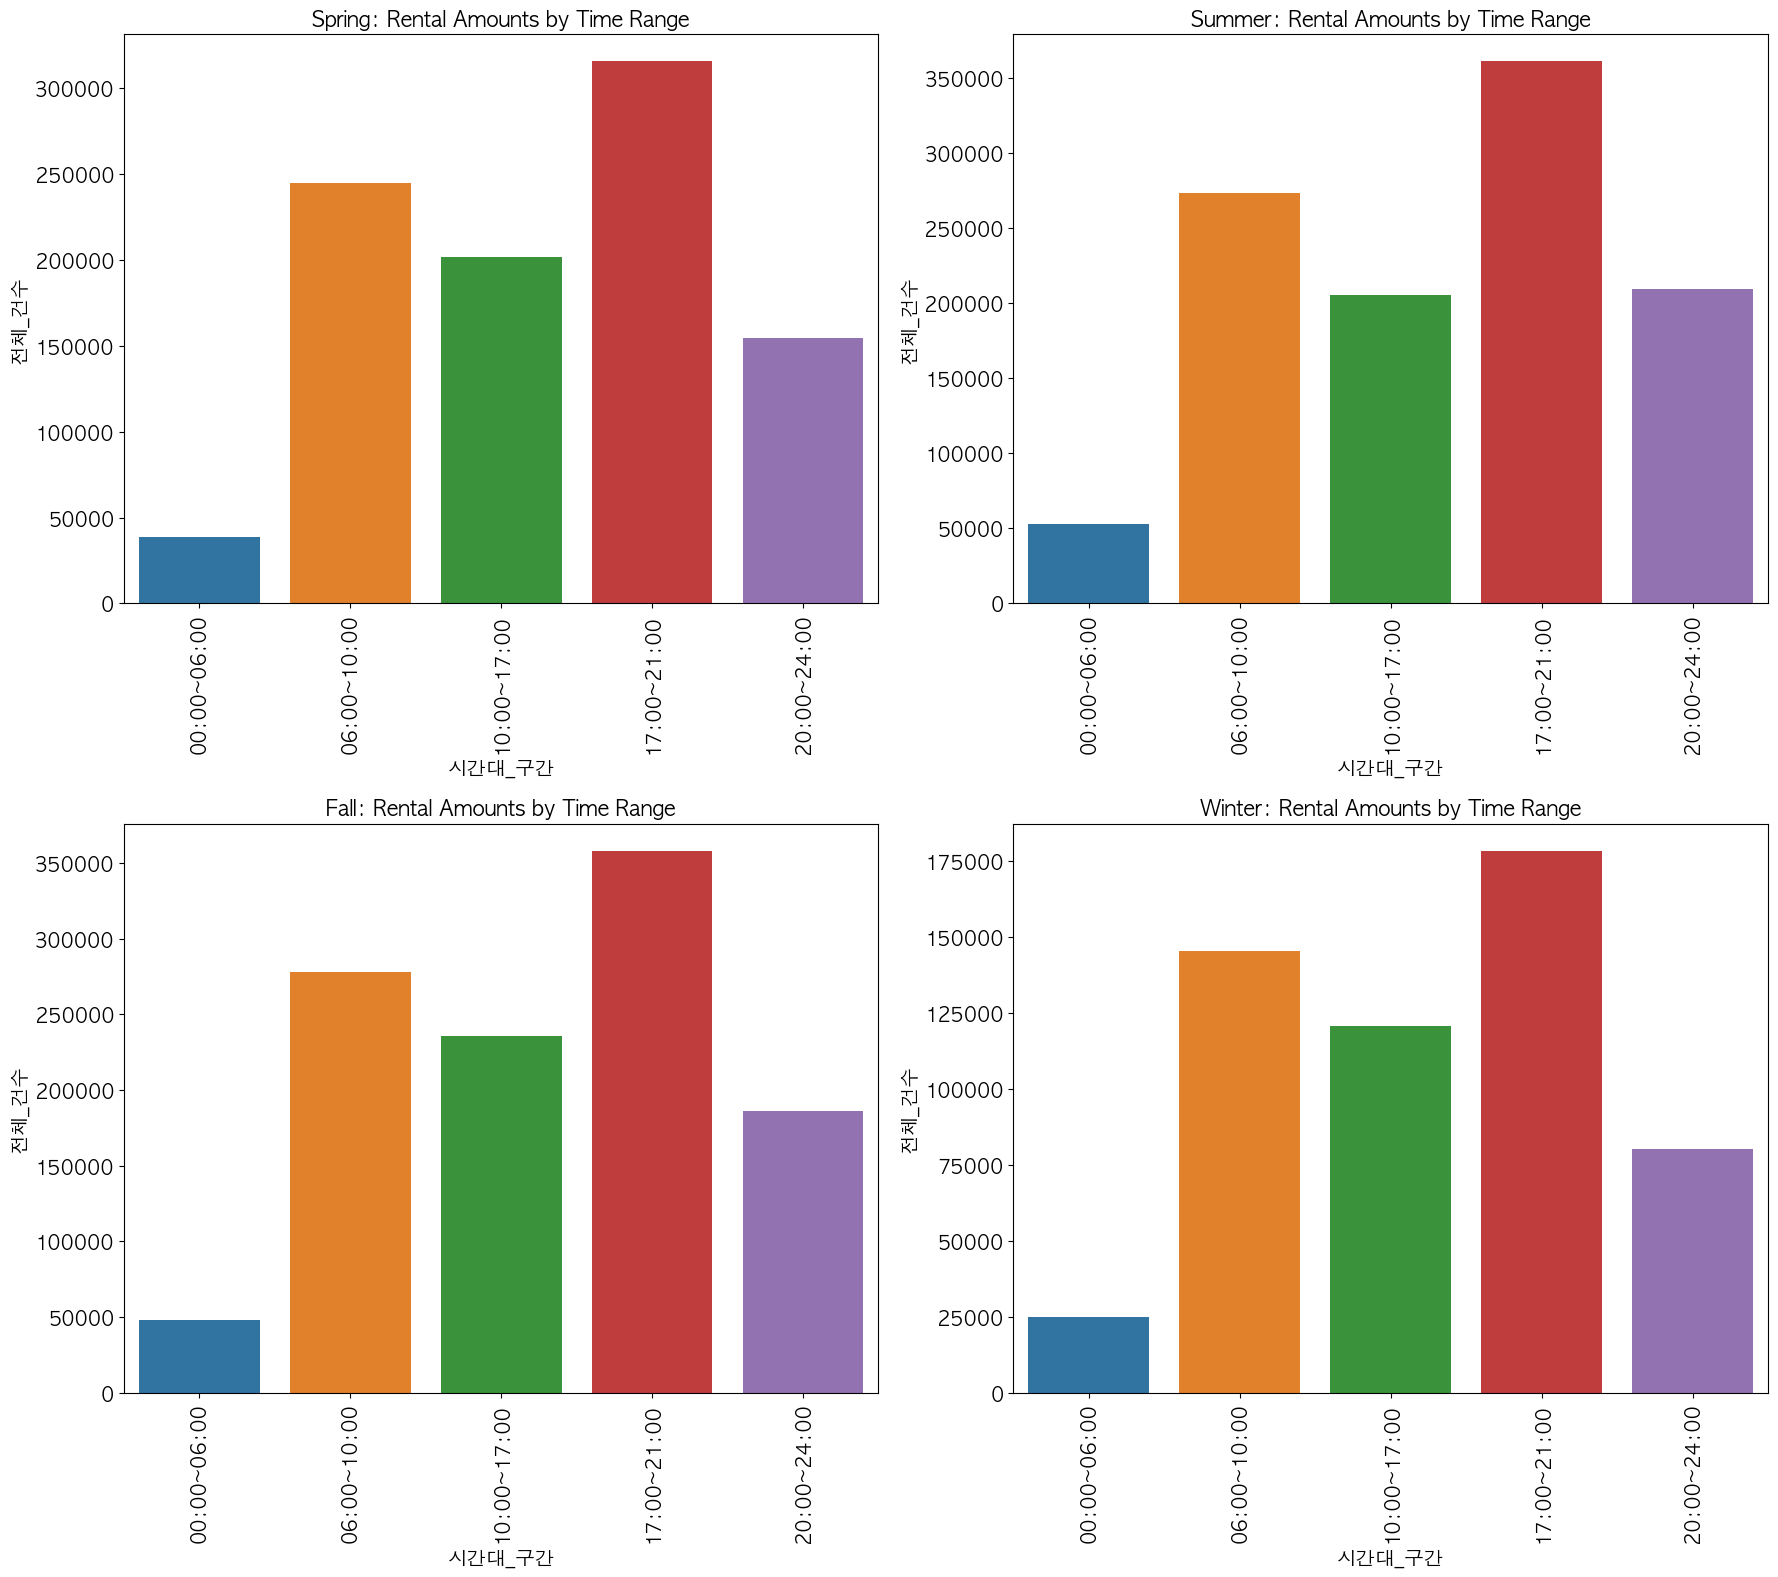

In [14]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 맥 OS 폰트 깨짐 방지 코드
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2행 2열의 subplots 준비
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15) 
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 16)) 

# subplots 할당 
sns.barplot(x='시간대_구간', y='전체_건수', data=spring_data.groupby('시간대_구간').sum().reset_index(), ax=axes[0, 0])
sns.barplot(x='시간대_구간', y='전체_건수', data=summer_data.groupby('시간대_구간').sum().reset_index(), ax=axes[0, 1])
sns.barplot(x='시간대_구간', y='전체_건수', data=fall_data.groupby('시간대_구간').sum().reset_index(), ax=axes[1, 0])
sns.barplot(x='시간대_구간', y='전체_건수', data=winter_data.groupby('시간대_구간').sum().reset_index(), ax=axes[1, 1])

# subplots 이름 정해주기
axes[0, 0].set(title='Spring: Rental Amounts by Time Range')
axes[0, 1].set(title='Summer: Rental Amounts by Time Range')
axes[1, 0].set(title='Fall: Rental Amounts by Time Range')
axes[1, 1].set(title='Winter: Rental Amounts by Time Range')

# x축 회전
axes[0, 0].tick_params(axis='x', labelrotation=90)
axes[0, 1].tick_params(axis='x', labelrotation=90)
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

# 출력
plt.tight_layout() 
plt.show()

### 계절별 / 일평균 / 시간 구간별 따릉이 이용량 

In [21]:
print(spring_data['기준_날짜'].nunique())
print(summer_data['기준_날짜'].nunique())
print(fall_data['기준_날짜'].nunique())
print(winter_data['기준_날짜'].nunique())

64
66
65
59


In [29]:
spring_data_time_range = spring_data.groupby(['기준_날짜', '시간대_구간'])['전체_건수'].sum().reset_index()
summer_data_time_range = summer_data.groupby(['기준_날짜', '시간대_구간'])['전체_건수'].sum().reset_index()
fall_data_time_range = fall_data.groupby(['기준_날짜', '시간대_구간'])['전체_건수'].sum().reset_index()
winter_data_time_range = winter_data.groupby(['기준_날짜', '시간대_구간'])['전체_건수'].sum().reset_index()

In [38]:
spring_data_time_range

,기준_날짜,시간대_구간,전체_건수
0,2023-04-03,00:00~06:00,641
1,2023-04-03,06:00~10:00,4053
2,2023-04-03,10:00~17:00,3472
3,2023-04-03,17:00~21:00,5578
4,2023-04-03,20:00~24:00,2610
...,...,...,...
315,2024-03-29,00:00~06:00,534
316,2024-03-29,06:00~10:00,3005
317,2024-03-29,10:00~17:00,1476
318,2024-03-29,17:00~21:00,4012


In [42]:
spring_data_time_range_avg = spring_data_time_range.groupby('시간대_구간')['전체_건수'].mean().reset_index()
summer_data_time_range_avg = summer_data_time_range.groupby('시간대_구간')['전체_건수'].mean().reset_index()
fall_data_time_range_avg = fall_data_time_range.groupby('시간대_구간')['전체_건수'].mean().reset_index()
winter_data_time_range_avg = winter_data_time_range.groupby('시간대_구간')['전체_건수'].mean().reset_index()


In [44]:
winter_data_time_range_avg

,시간대_구간,전체_건수
0,00:00~06:00,426.101695
1,06:00~10:00,2464.610169
2,10:00~17:00,2049.169492
3,17:00~21:00,3023.084746
4,20:00~24:00,1360.677966


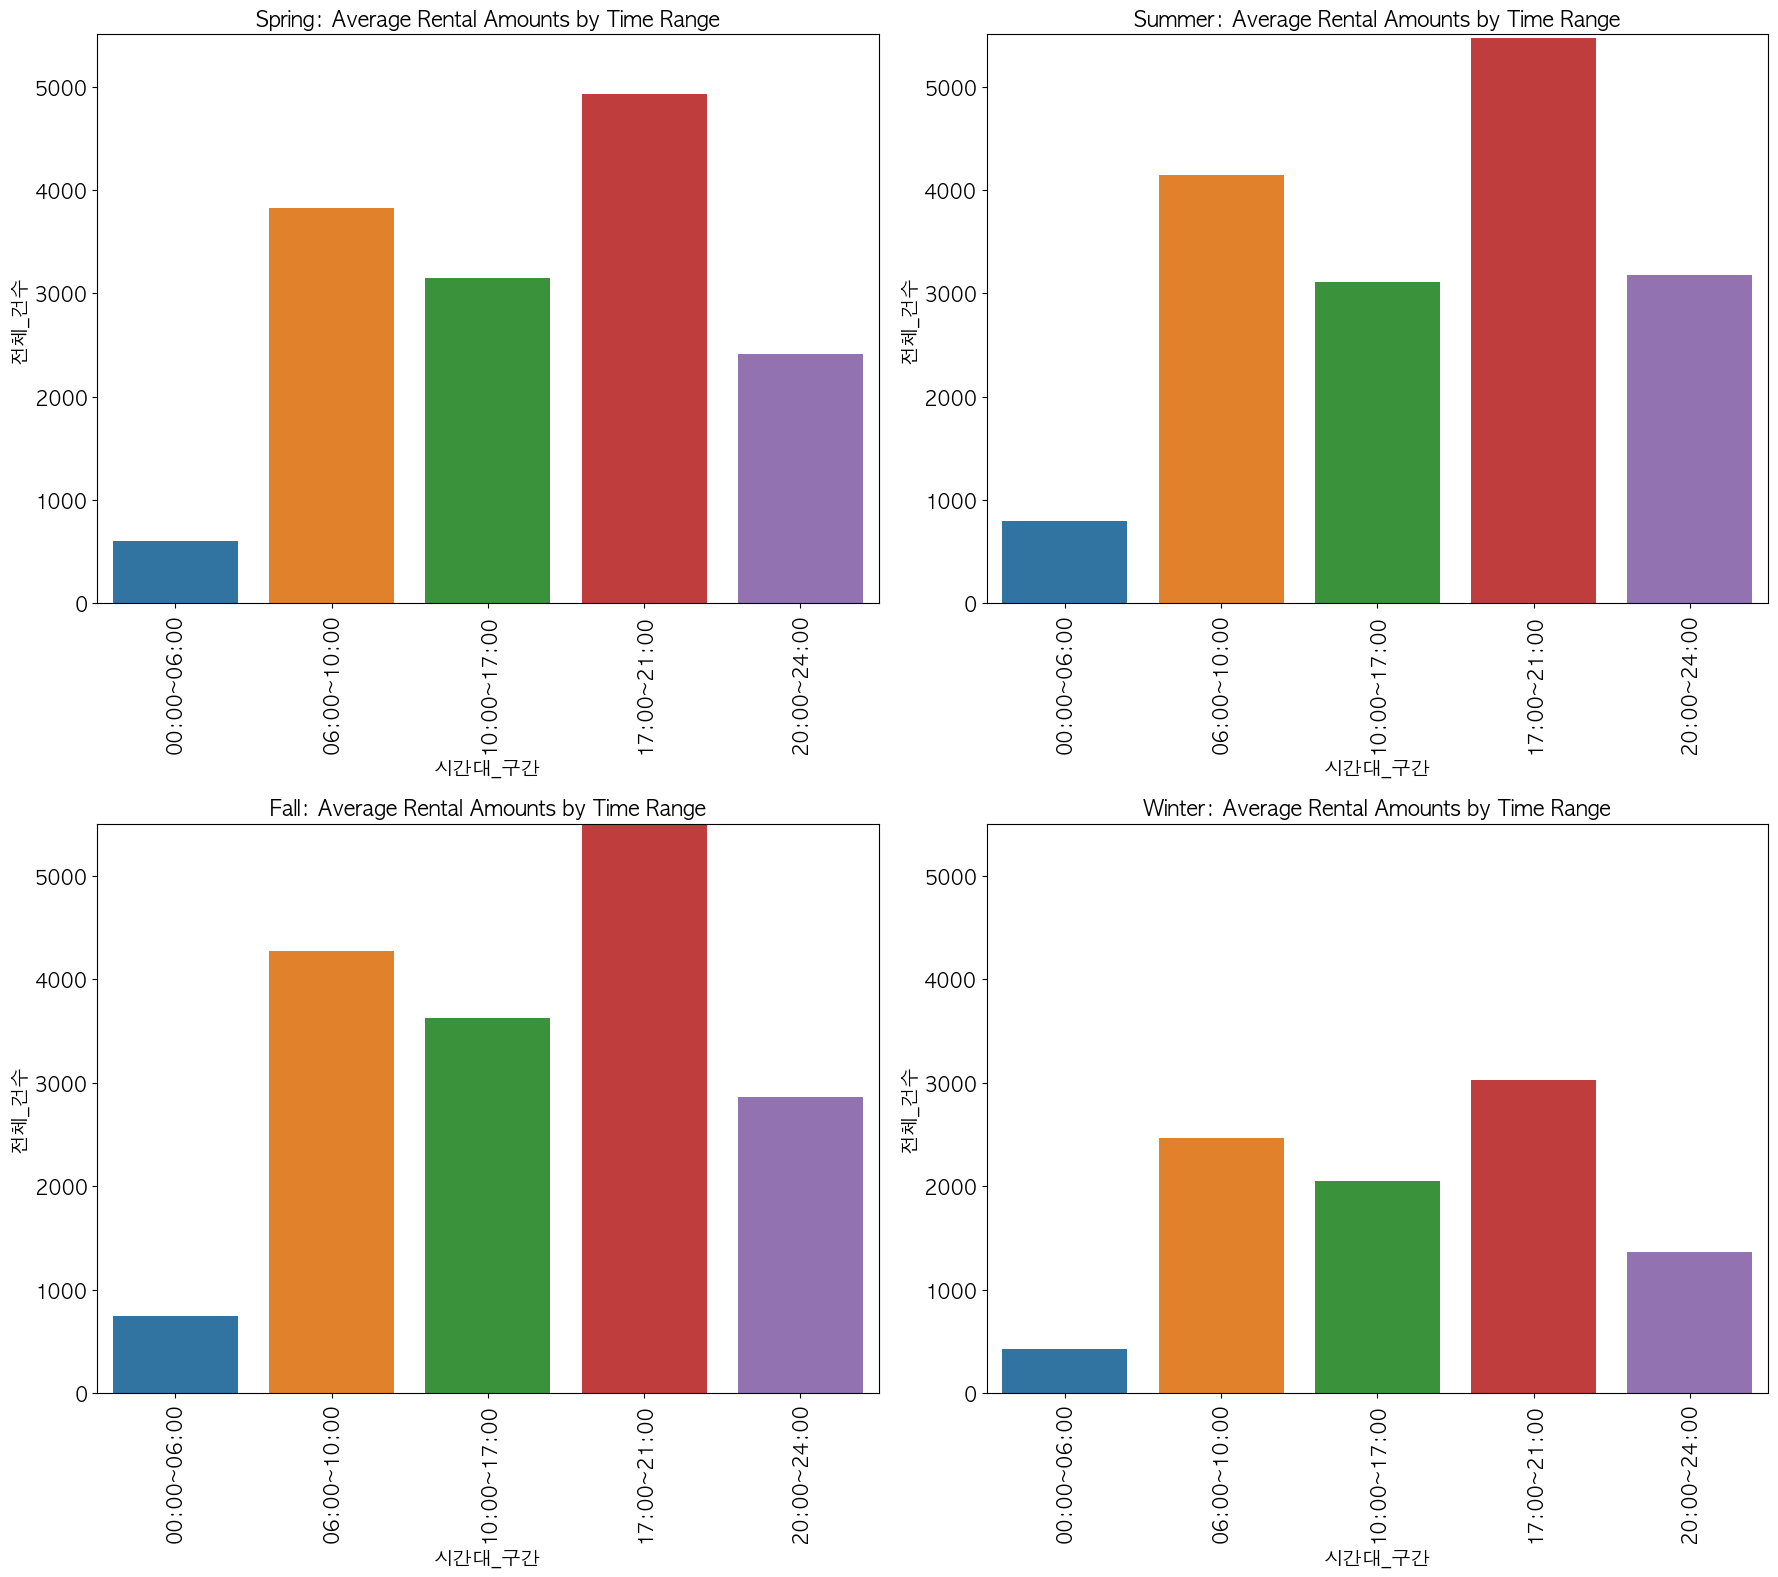

In [46]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 맥 OS 폰트 깨짐 방지 코드
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2행 2열의 subplots 준비
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15) 
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 16)) 

# 데이터의 y축 최대값 계산
max_y = max(
    spring_data_time_range_avg['전체_건수'].max(),
    summer_data_time_range_avg['전체_건수'].max(),
    fall_data_time_range_avg['전체_건수'].max(),
    winter_data_time_range_avg['전체_건수'].max()
)

# subplots 할당 및 동일한 y축 범주 설정
sns.barplot(x='시간대_구간', y='전체_건수', data=spring_data_time_range_avg, ax=axes[0, 0])
axes[0, 0].set_ylim(0, max_y)

sns.barplot(x='시간대_구간', y='전체_건수', data=summer_data_time_range_avg, ax=axes[0, 1])
axes[0, 1].set_ylim(0, max_y)

sns.barplot(x='시간대_구간', y='전체_건수', data=fall_data_time_range_avg, ax=axes[1, 0])
axes[1, 0].set_ylim(0, max_y)

sns.barplot(x='시간대_구간', y='전체_건수', data=winter_data_time_range_avg, ax=axes[1, 1])
axes[1, 1].set_ylim(0, max_y)

# subplots 이름 정해주기
axes[0, 0].set(title='Spring: Average Rental Amounts by Time Range')
axes[0, 1].set(title='Summer: Average Rental Amounts by Time Range')
axes[1, 0].set(title='Fall: Average Rental Amounts by Time Range')
axes[1, 1].set(title='Winter: Average Rental Amounts by Time Range')

# x축 회전
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

# 출력
plt.tight_layout() 
plt.show()


### 플러스 시작_대여소별 

In [ ]:
spring_data_time_range = spring_data.groupby(['기준_날짜', '시간대_구간'])['전체_건수'].sum().reset_index()
summer_data_time_range = summer_data.groupby(['기준_날짜', '시간대_구간'])['전체_건수'].sum().reset_index()
fall_data_time_range = fall_data.groupby(['기준_날짜', '시간대_구간'])['전체_건수'].sum().reset_index()
winter_data_time_range = winter_data.groupby(['기준_날짜', '시간대_구간'])['전체_건수'].sum().reset_index()